###### Ze względu na moje zamiłowanie do motoryzacji, postanowiłem przeprowadzić poniższą analizę, która ma na celu analizę pewnych cech samochodów oraz ich zależności oraz zbudowanie modelu predykcyjnego pozwalającego, na dokładne przewidzenie ceny samochodu bazując na odpowiednich cechach.

# 1. Import Bibliotek

In [121]:
import numpy as np
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from operator import itemgetter
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, KFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

# 2. Import danych i wstępna ich analiza

In [2]:
df = pd.read_csv('D:\PYTHON\car prices\CarPrice_Assignment.csv')
warnings.filterwarnings("ignore")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


# 3. Podstawowy preprocessing

###### Poniżej usuwam niepotrzebną zmienną car_ID, sprawdzam braki danych i czy występują duplikaty.

In [5]:
df = df.drop('car_ID',axis=1)

In [6]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [8]:
#Bardzo dużo różnych nazw samochodów
df['CarName'].value_counts()

toyota corona               6
toyota corolla              6
peugeot 504                 6
subaru dl                   4
mazda 626                   3
                           ..
mitsubishi pajero           1
nissan nv200                1
honda civic (auto)          1
nissan leaf                 1
buick electra 225 custom    1
Name: CarName, Length: 147, dtype: int64

###### Wyciągam ze zmiennej CarName marki samochodów i poprawiam literówki

In [9]:
#Wyjmuje marke samochodu z CarName
df['CarName'] = df['CarName'].str.split(' ', expand=True)
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 
                                                 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
# Sprawdzenie, które zmienne są kategoryczne
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
num_cols = [i for i in df.columns if i not in cat_features]
cat_features

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [12]:
num_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

# 4. Analiza zmiennej celu

##### 4.1 Analiza rozkładu cen samochodów

<AxesSubplot:xlabel='price', ylabel='Density'>

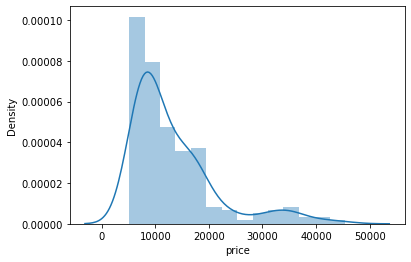

In [13]:
sns.distplot(df['price'])

In [14]:
print(f"Kurtoza zmiennej celu: {df['price'].kurt()}")
print(f"Skośność zmiennej celu: {df['price'].skew()}")

Kurtoza zmiennej celu: 3.051647871396399
Skośność zmiennej celu: 1.7776781560914454


###### Zmienna celu charakteryzuje się asymetrią prawostronną, czyli średnio większość samochodów kosztuje mniej, niż przeciętny samochód. Kurtoza jest dodatnia, więc rozkład naszej zmiennej jest leptokurtyczny

Text(0.5, 0, 'Cena')

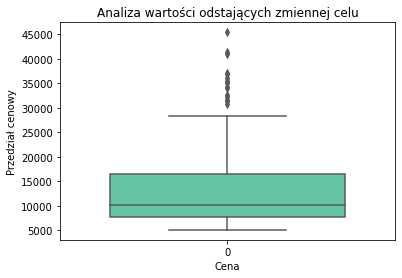

In [15]:
sns.boxplot(data=df['price'], orient="v", palette="Set2" ,whis=1.5, saturation=1, width=0.7)
plt.title("Analiza wartości odstających zmiennej celu")
plt.ylabel("Przedział cenowy")
plt.xlabel("Cena")

###### Z powyższego box-plota możemy wywnioskować, że znajduje się kilka obserwacji, które moglibyśmy uznać, za wartości odstające.

# 5. Analiza zmiennych kategorycznych i numerycznych

###### 5.1 Zmienne kategoryczne

In [16]:
df[cat_features]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


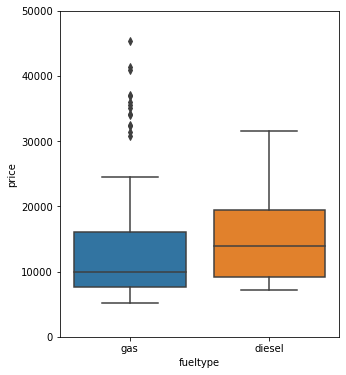

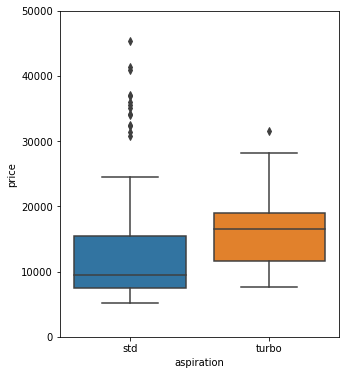

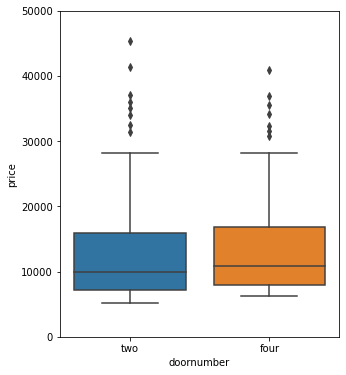

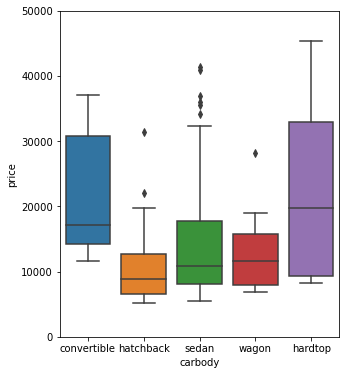

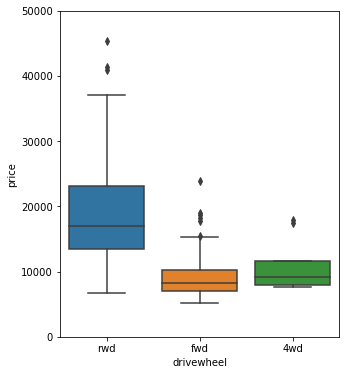

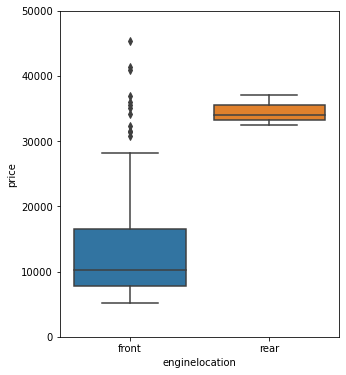

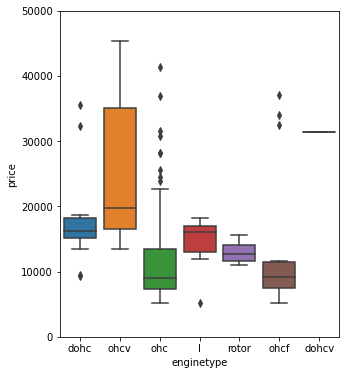

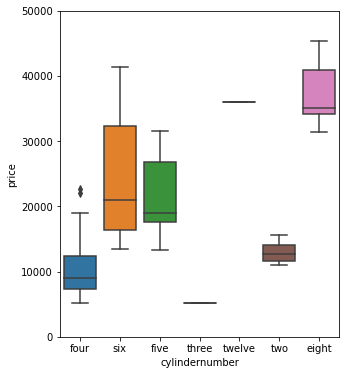

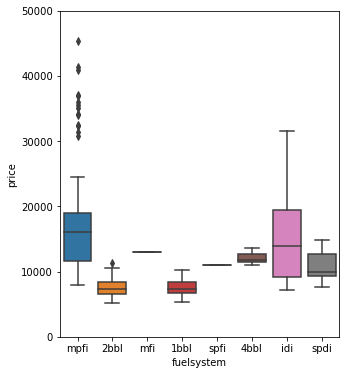

In [17]:
cat_features_copy = cat_features.copy()
cat_features_copy.remove('CarName')
for i in cat_features_copy:
    data = pd.concat([df['price'], df[i]], axis=1)
    f, ax = plt.subplots(figsize=(5, 6))
    fig = sns.boxplot(x=i, y="price", data=data)
    fig.axis(ymin=0, ymax=50000)

Jak widać na powyższych box-plotach większość zmiennych posiada wartości odstające. Prawie wszystkie zmienne na pierwszy rzut oka istotnie wpływają na cenę samochodu.Jedyna zmienna, do której mogę mieć podejrzenia to "doornumber" gdzie niezależnie od ilości drzwi cena kształtuje się na bardzo podobnym poziomie.

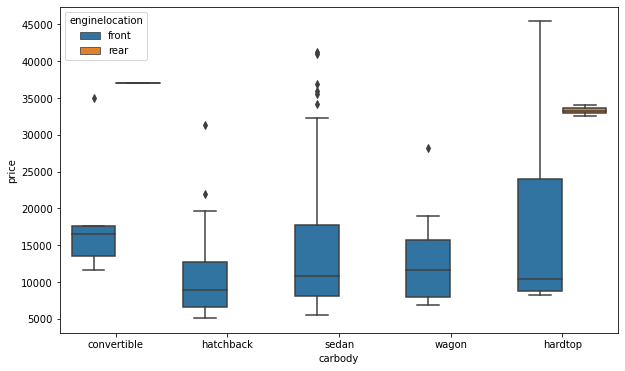

In [18]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df)
plt.show()

Umiejscowienie silnika z przodu wiąże się ze zdecydowanie niższą ceną, niż w przypadku silnika z tyłu. Między różnymi typami samochodu 
rzeczywiście widać różnice w cenie. Na pewno obie te zmienne istotnie wpływają na cenę

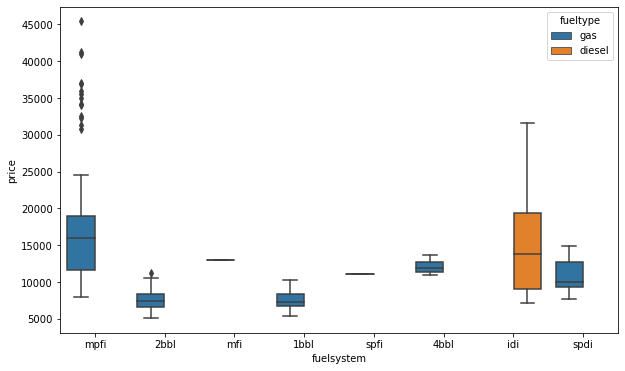

In [19]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)
plt.show()

System paliwowy istotnie różnicuje cenę. Zdecydowanie większość samochodów jest na benzynę. 

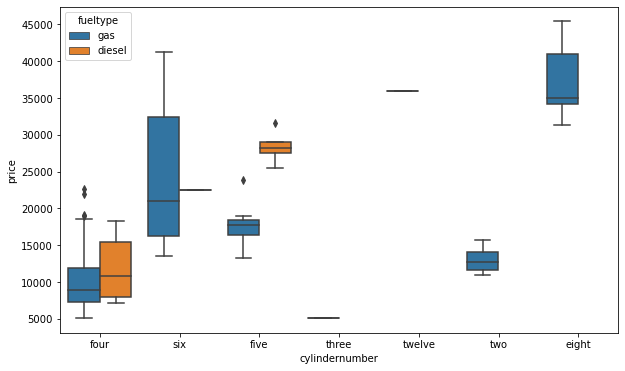

In [20]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df)
plt.show()

Zdecydowanie im więcej jest cylindrów tym cena jest wyższa. Najwięcej wartości odstających mają samochody mające 4 lub mniej cylindry. Diesel z podobną ilością cylindrów kosztuje więcej niż benzyna.

###### 5.2 Zmienne numeryczne

<Figure size 1440x720 with 0 Axes>

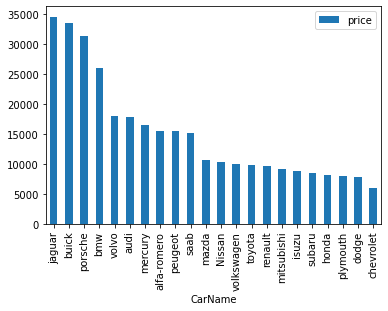

<Figure size 1440x720 with 0 Axes>

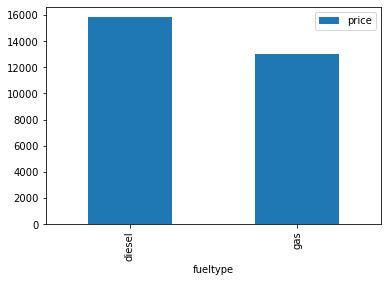

<Figure size 1440x720 with 0 Axes>

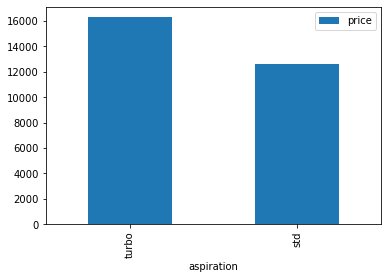

<Figure size 1440x720 with 0 Axes>

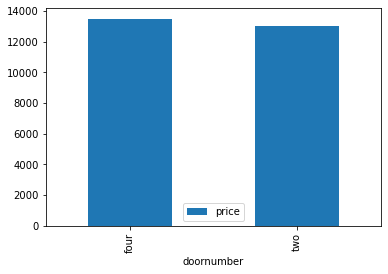

<Figure size 1440x720 with 0 Axes>

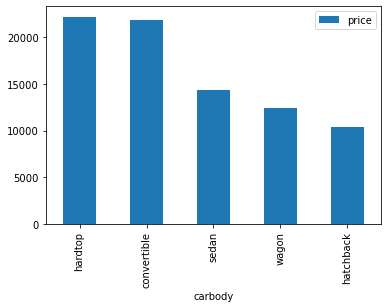

<Figure size 1440x720 with 0 Axes>

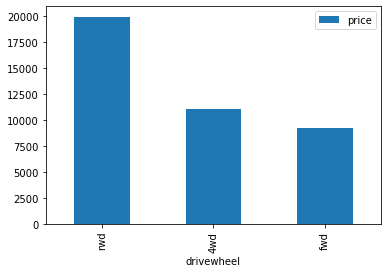

<Figure size 1440x720 with 0 Axes>

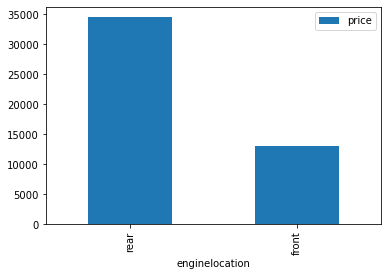

<Figure size 1440x720 with 0 Axes>

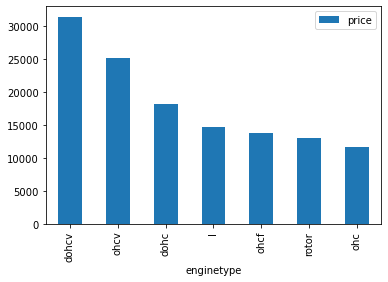

<Figure size 1440x720 with 0 Axes>

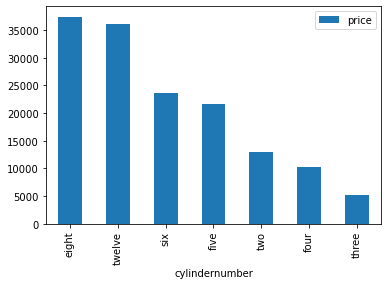

<Figure size 1440x720 with 0 Axes>

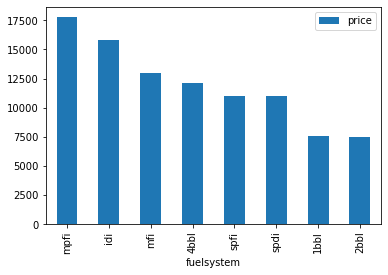

In [21]:
for i in cat_features:
    plt.figure(figsize=(20,10))
    df_CarName = pd.DataFrame(df.groupby([i])['price'].mean().sort_values(ascending = False))
    df_CarName.plot.bar()
    plt.show()
#...

Najdroższe samochody to Jaguary, a najtańsze to Chevrolety. Samochody zasilane benzyną sa tańsze od samochodów ON. Samochody z turbo są droższe niż auta bez turbo. Ilość drzwi samochodu bardzo mało wpływa na cenę auta. Typ samochodu istotnie wpływa na cenę, najdroższe są hardtopy, a najdroższe hatchbacki. Typ napędu również jest istotną zmienną, najdroższe auta są z napędem na tył, a najtańsze z napędem na przód. Auta z silnikiem z tyłu są najdroższe (prawdopodobnie dlatego, że auta z silnikiem z tyłu z reguły są sportowe). Typ silnika również istotnie różnicuje cenę samochodu, jak i system paliwowy.

In [22]:
num_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

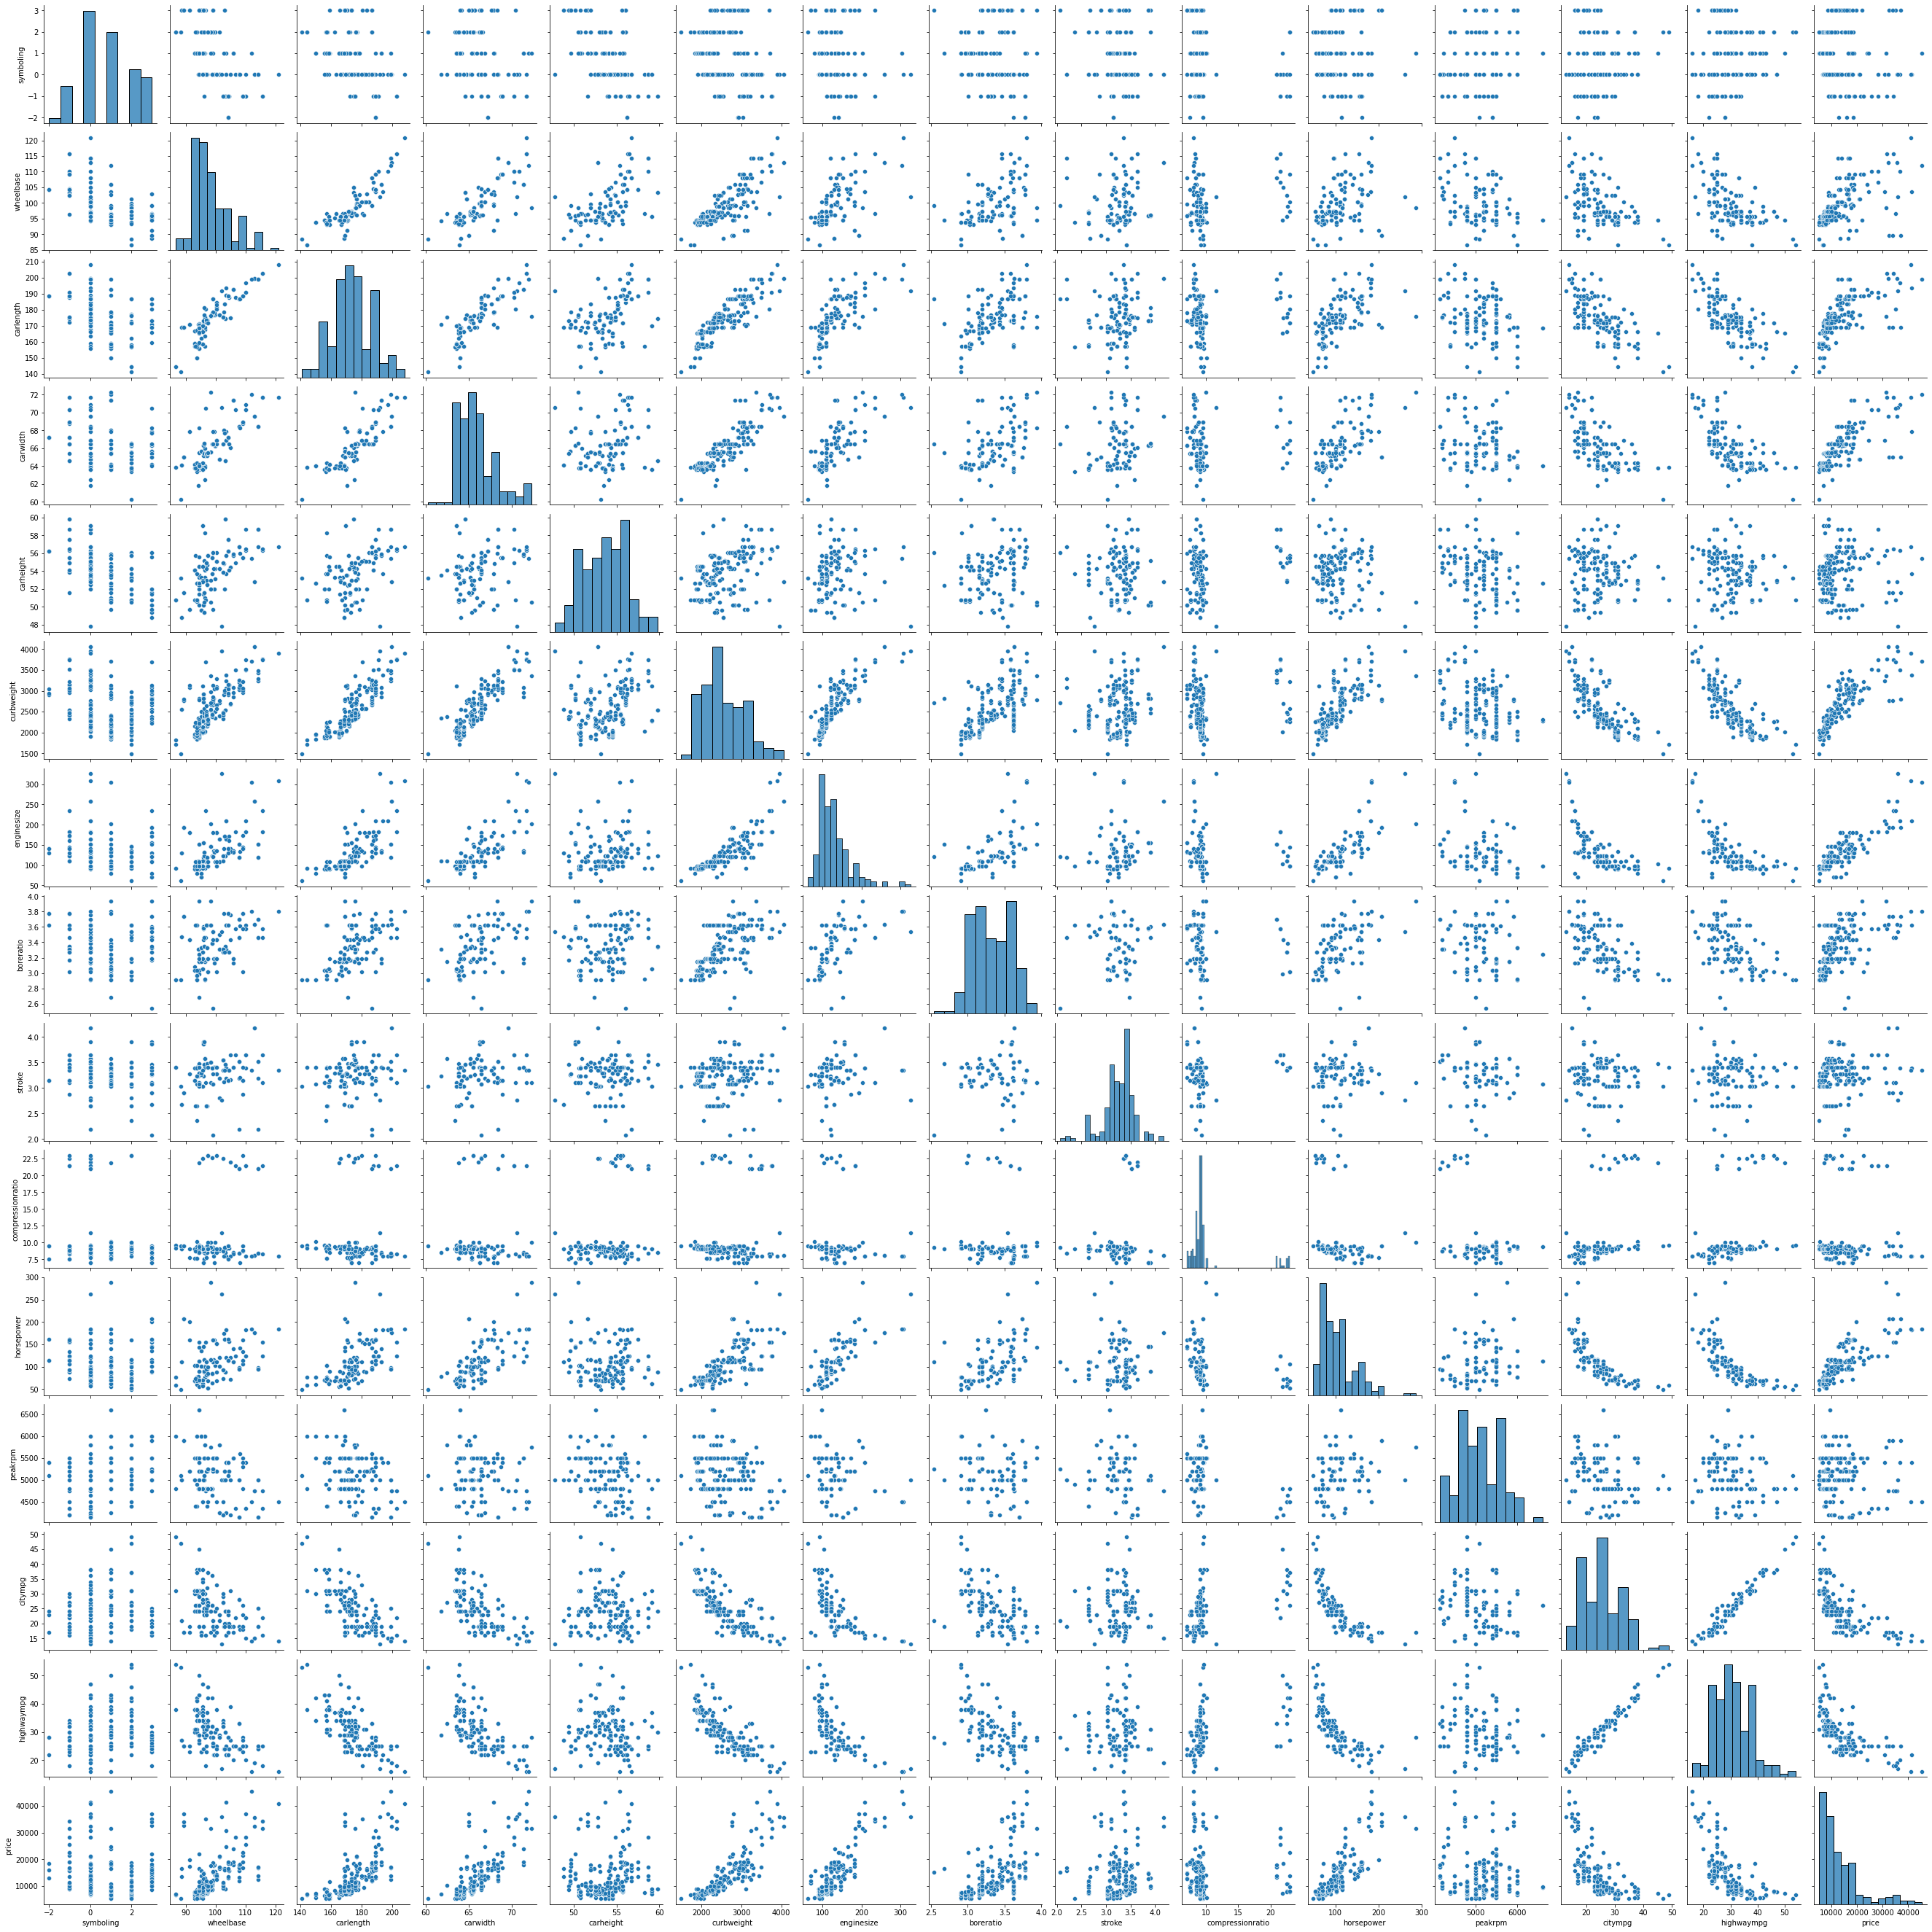

In [23]:
ax = sns.pairplot(df[num_cols])

carwidth , carlength, curbweight ,enginesize ,horsepower są dodatnio skorelowane z ceną
highwaympg, citympg są ujemnie skorelowane z ceną
compressionratio, peakrpm, stroke, carheight, symboling wydają się nie mieć wpływu na cenę


In [24]:
bazaCorr=df.corr()
np.abs(bazaCorr['price']).sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

Powyższy wydruk potwierdza fakt, że compressionratio, stroke, peakrpm, carheight i symboling nie wpływają na zmienną celu.

###### 5.3 Wybór zmiennych istotnie wpływających na zmienną celu

In [25]:
not_sig_cols = ['compressionratio', 'stroke', 'peakrpm', 'carheight', 'symboling']
sig_cols = [i for i in df.columns if i not in not_sig_cols]
df[sig_cols]
df.drop(not_sig_cols,axis=1)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470.0


##### 5.4 Analiza wartości odstających

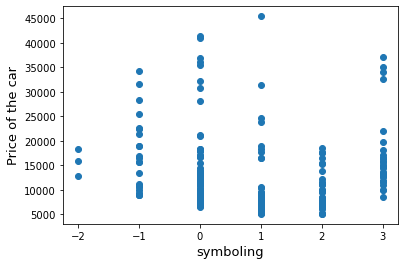

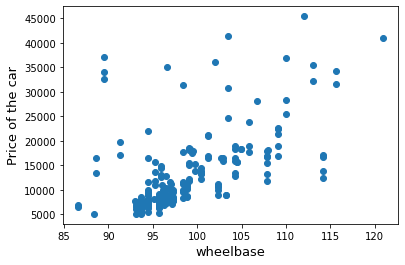

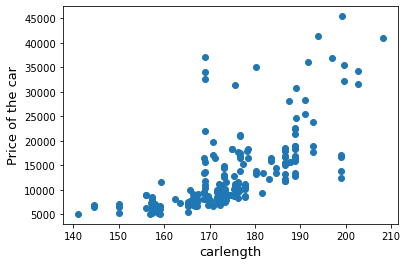

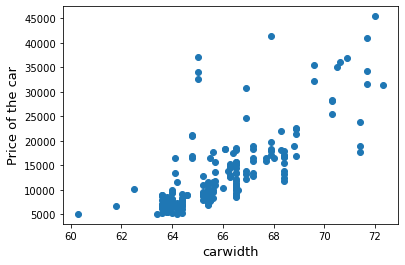

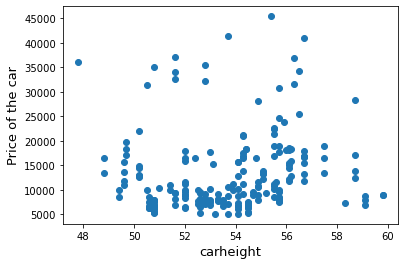

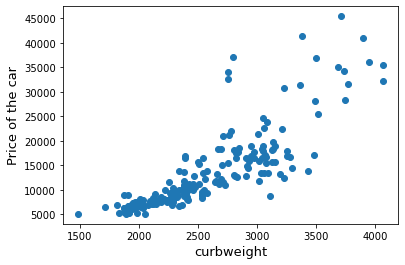

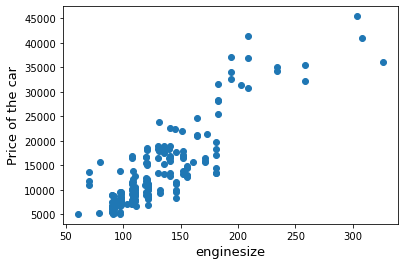

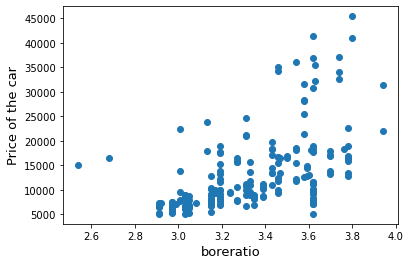

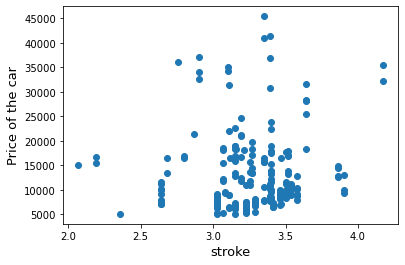

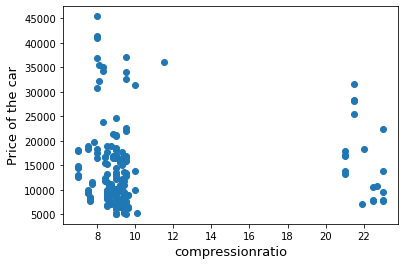

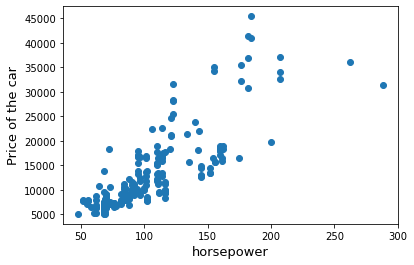

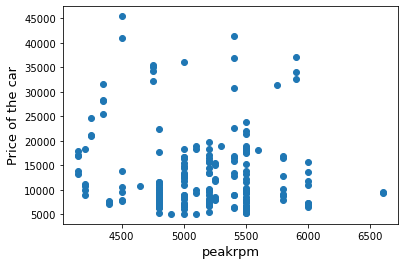

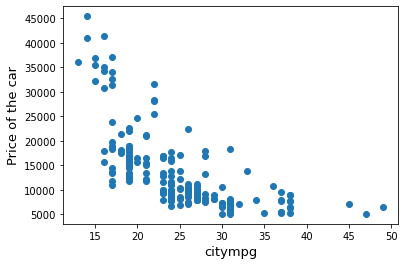

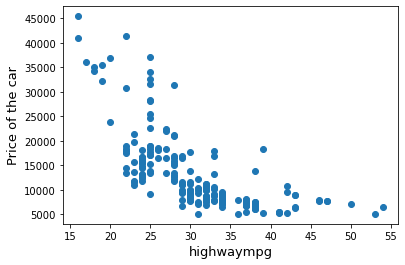

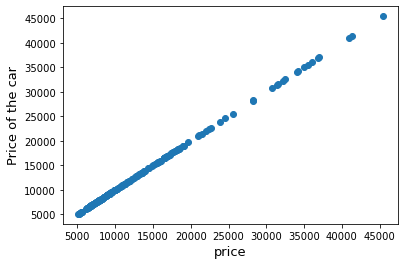

In [26]:
for i in num_cols:
    fig, ax = plt.subplots()
    ax.scatter(x = df[i], y = df['price'])
    plt.ylabel('Price of the car', fontsize=13)
    plt.xlabel(i, fontsize=13)
    plt.show()

Wnioski z powyższych wykresów:
    1) dla enginesize wartości ponad 250 są wartościami odstającymi
    2) dla horsepower wartości ponad 220 są wartościami odstającymi
    3) wartości mające curbweight z przedziału (2500;3000) i cenę ponad 30000 są wartościami odstającymi

###### 5.5 Usunięcie wartości odstających

In [27]:
df = df.drop(df[df['enginesize']>250].index)
df = df.drop(df[df['horsepower']>220].index)
df = df.drop(df[(df['curbweight']>2500) &(df['curbweight']>2500) & (df['price'] > 30000)].index)

# 6. Przygotowanie danych do modelowania

In [28]:
cat_features.remove('doornumber')
cat_features.remove('fuelsystem')

In [29]:
dummies = pd.get_dummies(df[cat_features], drop_first=True)
dummies.shape

(190, 37)

In [30]:
df = pd.concat([df,dummies],axis=1)
df.drop(cat_features,axis=1,inplace=True)
df.drop(['doornumber','fuelsystem'],axis=1,inplace=True)
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,1,0,0,0,0,0,1,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,1,0,0,0,0,0,1,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,1,0,0,0,1,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,1,0,0,0,1,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,1,0,0,0,0,0,0,0


# 7. Podział zbioru danych na testowy i treningowy

In [31]:
df_train,df_test = train_test_split(df,test_size=0.2)

In [32]:
print(f"Obserwacje w zbiorze treningowym: {len(df_train)}\nObserwacje w zbiorze testowym: {len(df_test)}\n")

Obserwacje w zbiorze treningowym: 152
Obserwacje w zbiorze testowym: 38



# 8. Przeskalowanie zmiennych

In [33]:
important_num_col = num_cols.copy()
important_num_col.remove('symboling')
important_num_col.remove('stroke')
important_num_col.remove('peakrpm')
important_num_col.remove('carheight')
important_num_col.remove('compressionratio')
scaler = StandardScaler()

In [34]:
df_train[important_num_col] = scaler.fit_transform(df_train[important_num_col])
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two
39,0,-0.323456,0.249312,-0.176831,54.1,-0.341380,-0.267864,-0.547694,3.58,9.0,...,0,0,1,0,0,0,1,0,0,0
20,0,-0.706961,-1.216696,-1.082208,52.0,-1.264228,-1.048599,-1.015827,3.11,9.6,...,0,0,1,0,0,0,1,0,0,0
172,2,0.040874,0.319963,0.049513,53.0,1.226293,1.137459,1.285824,3.50,9.3,...,1,0,1,0,0,0,1,0,0,0
168,2,0.040874,0.319963,0.049513,52.0,0.200647,1.137459,1.285824,3.50,9.3,...,1,0,1,0,0,0,1,0,0,0
121,1,-0.860363,-0.466029,-0.969036,50.8,-1.077322,-1.048599,-1.249893,3.23,9.4,...,0,0,1,0,0,0,1,0,0,0


Zanim przejdę do dalszego podziału naszego zbioru danych, sprawdzę korelacje między zmiennymi, aby upewnić się, że żadna ze zmiennych nie charakteryzuje się zbyt dużą korelacją ze zmienną objaśnianą i czy rzeczywiście na nią wpływają

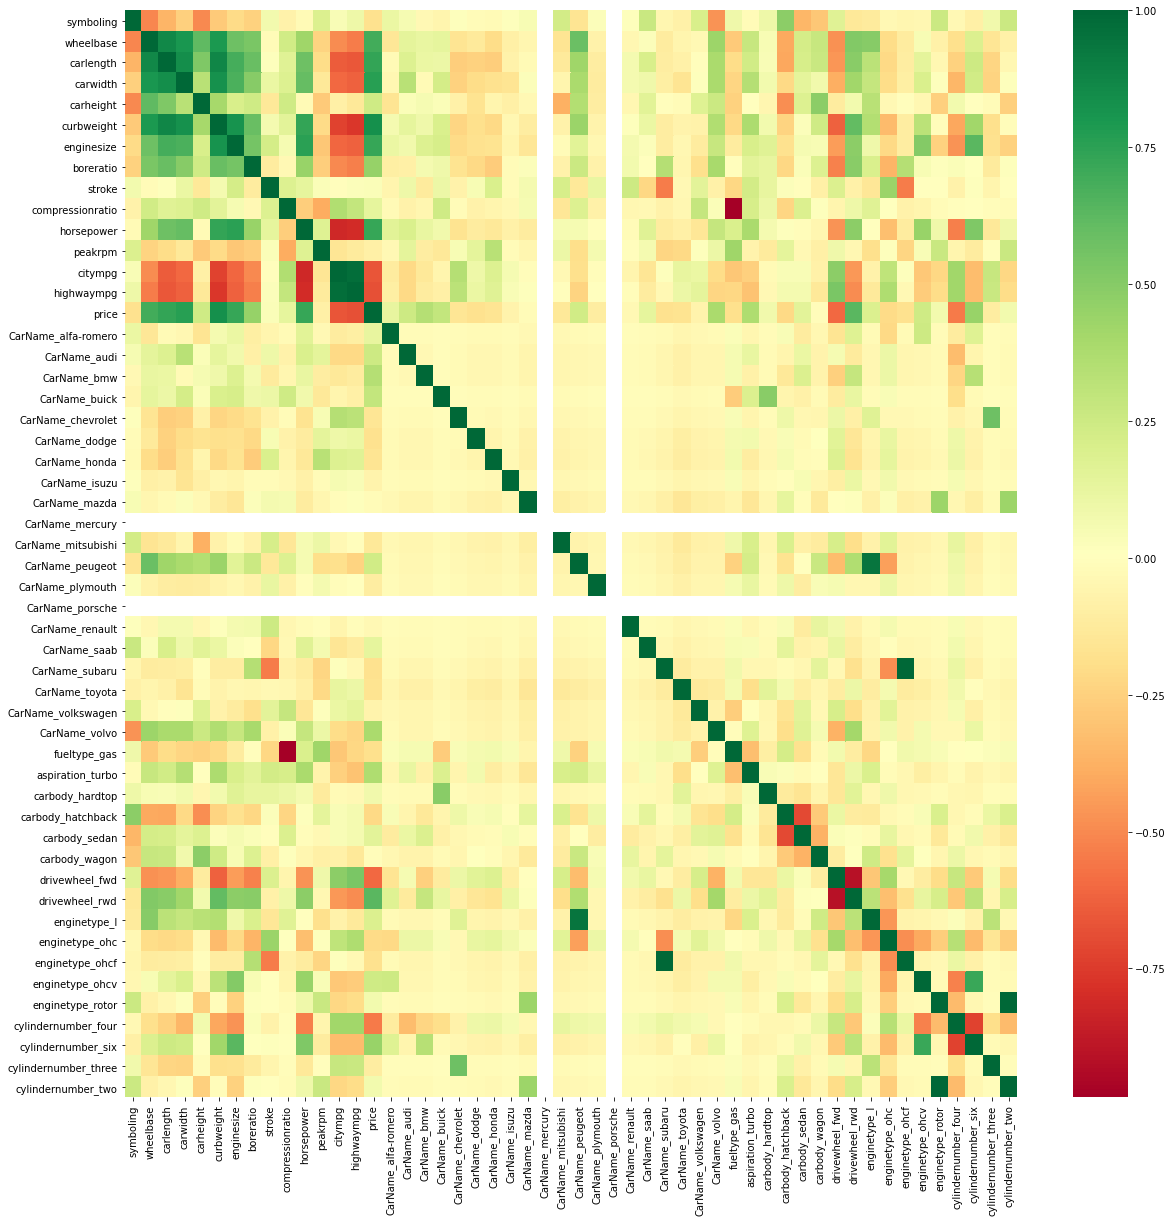

In [35]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

# 9. Podział zbioru na X_train, X_test, y_train, y_test

In [36]:
X_train = df_train.drop('price',axis=1)
y_train = df_train['price']
X_test = df_test.drop('price',axis=1)
y_test = df_test['price']

# 10. Budowanie modelu liniowej regresji

###### W poniższej częsci analizy będę brał pięć różnych modeli pod uwagę. Metodą oceniania tych modeli będzie negative mean squared error. ZOstanie przeprowadzony hyperparameter tuning, mający na celu zoptymalizowanie każdego modelu. Na koniec zostanie wybrany model, który minimalizuje negative mean squared error (błąd ma być jak najmniejszy)

###### 10.1 Model Lasso

In [104]:
model1_old = Lasso()
n_folds = 5
alpha = [0.0005, 0.005, 0.05, 0.001]
grid = dict(alpha=alpha)
kf = KFold(n_folds, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model1_old, param_grid=grid, n_jobs=-1, cv=kf, scoring='neg_mean_squared_error',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
result1 = grid_result.best_score_

Best: -0.183869 using {'alpha': 0.001}


###### Sprawdzenie jak dobrze poradził sobie model Lasso

In [106]:
model1_new = Lasso(alpha = 0.001)
model1_new.fit(X_train,y_train)
print(f"Lasso best score is {result1}")

Lasso best score is -0.18386884091430417


###### 10.2 Model Elastic Net Regression

In [107]:
model2_old = ElasticNet()
n_folds = 5
alpha = [0.0005, 0.005, 0.05, 0.01, 0.1]
l1_ratio = [0.5,0.6,0.9]
grid = dict(alpha=alpha,l1_ratio=l1_ratio)
kf = KFold(n_folds, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model2_old, param_grid=grid, n_jobs=-1, cv=kf, scoring='neg_mean_squared_error',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
result2 = grid_result.best_score_

Best: -0.179182 using {'alpha': 0.005, 'l1_ratio': 0.5}


###### Sprawdzenie jak dobrze poradził sobie model Elastic Net

In [111]:
model2_new = ElasticNet(alpha = 0.005, l1_ratio = 0.5)
model2_new.fit(X_train,y_train)
print(f"Elastic net best score is {result2}")

Elastic net best score is -0.17918184355832875


###### 10.3 Model Kernel Ridge Regression

In [108]:
model3_old = KernelRidge()
n_folds = 5
kernel = ['polynomial']
degree = [1,2,3,4,5] 
coef0 = [1,1.5,2,2.5,3]
grid = dict(kernel=kernel,degree=degree,coef0=coef0)
kf = KFold(n_folds, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model3_old, param_grid=grid, n_jobs=-1, cv=kf, scoring='neg_mean_squared_error',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
result3 = grid_result.best_score_

Best: -0.239525 using {'coef0': 1, 'degree': 1, 'kernel': 'polynomial'}


###### Sprawdzenie jak dobrze poradził sobie model Kernel Ridge Regression

In [112]:
model3_new = KernelRidge(coef0=1,degree=1,kernel='polynomial')
model3_new.fit(X_train,y_train)
print(f"Kernel Ridge Regression best score is {result3}")

Kernel Ridge Regression best score is -0.23952478987060327


###### 10.4 Model Gradient Boosting Regression

In [81]:
model4_old = GradientBoostingRegressor()
n_folds = 5
n_estimators = [300,400,500]
learning_rate = [0.01,0.05,0.06]
grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
kf = KFold(n_folds, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model4_old, param_grid=grid, n_jobs=-1, cv=kf, scoring='neg_mean_squared_error',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.147191 using {'learning_rate': 0.06, 'n_estimators': 300}


In [109]:
model4_old = GradientBoostingRegressor(learning_rate = 0.06, n_estimators = 300)
n_folds = 5
max_depth = [3,4,5]
min_samples_leaf = [10,5,15]
min_samples_split = [15,20,25] 
grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
kf = KFold(n_folds, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model4_old, param_grid=grid, n_jobs=-1, cv=kf, scoring='neg_mean_squared_error',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
result4 = grid_result.best_score_

Best: -0.156345 using {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 25}


###### Sprawdzenie jak dobrze poradził sobie model Gradient Boosting Regressor

In [113]:
model4_new = GradientBoostingRegressor(learning_rate=0.06, n_estimators = 300, max_depth = 4, min_samples_leaf = 5, min_samples_split = 25)
model4_new.fit(X_train,y_train)
print(f"Gradient Boosting Regressor best score is {result4}")

Gradient Boosting Regressor best score is -0.15634452147484862


###### 10.5 Model XGBoost

In [86]:
model5_old = xgb.XGBRegressor()
n_folds = 5
colsample_bytree=[0.4603,0.3,0.2]
gamma=[0.0468, 0.0521, 0.0931]
learning_rate=[0.04,0.05,0.03]
grid = dict(colsample_bytree=colsample_bytree,gamma=gamma,learning_rate=learning_rate)
kf = KFold(n_folds, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model5_old, param_grid=grid, n_jobs=-1, cv=kf, scoring='neg_mean_squared_error',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.148912 using {'colsample_bytree': 0.4603, 'gamma': 0.0521, 'learning_rate': 0.05}


In [87]:
model5_old = xgb.XGBRegressor(colsample_bytree=0.4603,gamma=0.0521,learning_rate=0.05)
n_folds = 5
min_child_weight=[1.7817,2.1,2.4]
n_estimators=[1700,1900,2200]
max_depth=[3,4,5]
grid = dict(min_child_weight=min_child_weight,n_estimators=n_estimators,max_depth=max_depth)
kf = KFold(n_folds, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model5_old, param_grid=grid, n_jobs=-1, cv=kf, scoring='neg_mean_squared_error',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -0.133205 using {'max_depth': 3, 'min_child_weight': 2.1, 'n_estimators': 1700}


In [110]:
model5_old = xgb.XGBRegressor(colsample_bytree=0.4603,gamma=0.0521,learning_rate=0.05, max_depth = 3, min_child_weight= 2.1, n_estimators=1700)
n_folds = 5
reg_alpha=[0.4640, 0.3, 0.5] 
reg_lambda=[0.8571, 0.6, 0.523]
subsample=[0.5213, 0.47, 0.3281]
grid = dict(reg_alpha=reg_alpha,reg_lambda=reg_lambda,subsample=subsample)
kf = KFold(n_folds, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model5_old, param_grid=grid, n_jobs=-1, cv=kf, scoring='neg_mean_squared_error',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
result5 = grid_result.best_score_

Best: -0.140650 using {'reg_alpha': 0.464, 'reg_lambda': 0.6, 'subsample': 0.3281}


###### Sprawdzenie jak dobrze poradził sobie model XGBoost

In [114]:
model5_new = xgb.XGBRegressor(colsample_bytree=0.4603,gamma=0.0521,learning_rate=0.05, max_depth = 3, min_child_weight= 2.1, n_estimators=1700,reg_alpha=0.464,reg_lambda=0.6,subsample=0.3281)
model5_new.fit(X_train,y_train)
print(f"XGBoost best score is {result5}")

XGBoost best score is -0.1406503940958437


In [119]:
results = (result1,result2,result3,result4,result5)
nazwy = ['Lasso', 'Elastic Net','Kernel Ridge','Gradient Boosting Regression','XGBoost']
z=0
for i in results:
    print(nazwy[z]+'\n')
    print(i)
    print('\n')
    z = z+1

Lasso

-0.18386884091430417


Elastic Net

-0.17918184355832875


Kernel Ridge

-0.23952478987060327


Gradient Boosting Regression

-0.15634452147484862


XGBoost

-0.1406503940958437




###### Patrząc na powyższe wyniki, model XGBoost wypada najlepiej na tle konkurentów.